# Lab 3 (Due @ by 11:59 pm via Canvas/Gradescope)

#! snip: Lab3
# $\color{red}{\text{SOLUTIONS}}$ 
#! snip-end

Due: Tuesday Nov 7 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Group Work

You are encouraged to work in groups for this Lab, however each student should submit their own notebook file to Gradescope. While each Part of the Lab depends on previous parts, talking through the problem with your group should help speed up both understanding and arriving at a solution. 

In [1]:
#! snip: Lab3

!python3 -m snip_copy Lab3_Solutions.ipynb

#! snip-end

snip-copied: Lab3.ipynb


In [2]:
# you might use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as py

## Part 1: Exploring Data and Defining a Question (20 points)

For this lab, you will use the data from our [DS 3000 Spotify Playlist](https://open.spotify.com/playlist/6Bl2siSxFI0mmdzOwy562o). A data set containing the first 100 songs is on Canvas, in the labs module, called `spotify100.csv`. This is the data set we'll be using for the entirety of the lab. In this first part, you must:

1. Read in the data and print the first few rows.
2. Choose, either on your own or via discussion with your classmates, **one numeric feature** that you are interested in predicting with **one other numeric feature**.
3. Generate a scatterplot that examines the relationship between two numeric features you chose, making sure it is labelled correctly and that the features are on the appropriate axis.
4. Discuss **in a markdown cell**, *why* you chose these features, which one you are predicting (the outcome) and which one you are predicting with (the input), **and** based on the scatterplot, your intuition as to whether a simple linear regression model will be (a) appropriate and (b) a good fit to the data.
5. Formally define, **in a markdown cell, using $\LaTeX$ typesetting** the mathematical notation for the simple linear regression model.

In [3]:
#! snip: Lab3

df_spot = pd.read_csv("spotify100.csv")
df_spot.head()

#! snip-end

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,song_title,artist_name
0,0.631,0.605,0,-8.730,1,0.0386,0.45300,0.000184,0.2910,0.250,115.281,https://api.spotify.com/v1/tracks/4LVDnRxfljiE...,295293,Pursuit Of Happiness (nightmare),Kid Cudi
1,0.531,0.766,8,-7.692,1,0.0582,0.00560,0.000000,0.2010,0.532,130.048,https://api.spotify.com/v1/tracks/1rS3J4u1G8f6...,179493,I Found A Way,Drake Bell
2,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,175238,I'm Good (Blue),David Guetta
3,0.620,0.712,9,-6.434,1,0.1000,0.22800,0.000003,0.0561,0.830,170.234,https://api.spotify.com/v1/tracks/4dRqYKhLVujx...,268600,This Life,Vampire Weekend
4,0.787,0.655,6,-8.339,0,0.0431,0.23800,0.000171,0.1380,0.650,102.485,https://api.spotify.com/v1/tracks/6shRGWCtBUOP...,208653,Upside Down,Jack Johnson


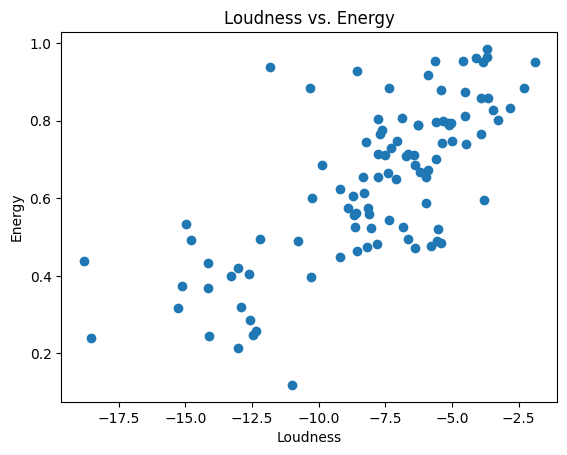

In [4]:
#! snip: Lab3

x = np.array(df_spot.loudness)
y = np.array(df_spot.energy)

plt.scatter(x, y)

plt.title("Loudness vs. Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy");

#! snip-end

#! snip: Lab3

Answers will vary here. Here's one example: I chose loudness as my $x$ feature and energy as my $y$ feature because when I examined the pairplot, this looked like the most linear relationship, and I think it makes sense that musicians have more control over loudness, and thus that loudness could be used to predict the energy of a song. Since I chose what I thought would be the best option for a linear regression, I think it may be appropriate, though there might be a slight curve, so we'll see. I guess I think that it should be a decent fit. The model is:

$$y = X\beta + \varepsilon$$

Where:

- $y$ is energy of a song
- $X$ is a matrix including a vector of 1's and the loudness of a song
- $\beta$ are the coefficients $\beta_0, \beta_1$ that represent the true intercept and slope of the relationship between loudness and energy
- $\varepsilon$ are the errors, assumed to be normally distributed

#! snip-end

# Part 2: Simple Linear Regression

Now, using the two features you chose in Part 1, you will implement a simple linear regression model and determine if it is adequate for predicting your chosen outcome feature with your chosen input feature.

## Part 2.1: Cross Validate, Assess Model Performance and Interpret the Full Line (40 points)

Use Leave One Out Cross Validation (LOO-CV) to fit the simple linear regression model and return the cross validated $MSE$ and $R^2$ for the model. **In a markdown cell**, interpret what the $R^2$ value represents, and discuss whether you think it is a good value. **Then**, fit the model to the full data set (i.e., do not cross validate) and return the estimated regression coefficients (intercept and slope). **In a markdown cell**, interpret what the slope and intercept mean, and discuss if their values make sense to you.

**Do all of this using `numpy` and linear algebra/math.** Do *not* use any pre-built functions.

In [5]:
#! snip: Lab3

X = np.column_stack([[1] * len(y),
                     x])

y_preds = np.empty(len(y))

# LOO-CV
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X[:obs,:], X[obs+1:,:]))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_b = np.matmul(np.linalg.inv(np.matmul(loocv_trainX.T, loocv_trainX)), np.matmul(loocv_trainX.T, loocv_trainy))
    # and predict the held out observation (and store it)
    y_preds[obs] = np.matmul(X[obs,:], loocv_b)

e = y - y_preds
mse = np.mean(e ** 2)
print(mse)
r2 = 1 - (mse/np.var(y))
print(r2)

#! snip-end

0.02023723483253339
0.5090675142807031


#! snip: Lab3

The $R^2$ is about 50.9\%, indicating that about half the variation in energy ($y$) is explained by the model using loudness ($x$), and since this is cross validated, it represents roughly the accuracy we can expect from predicting new songs. I think this seems like a reasonably good value. Obviously there are other things that will impact the energy of a song, but if half of the variation is explained by loudness, that means loudness must be a pretty important part of it.

#! snip-end

In [6]:
#! snip: Lab3

# Full data set
full_b = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
full_b

#! snip-end

array([0.97007385, 0.04149292])

#! snip: Lab3

The intercept of .97 suggests that when the loudness of a song is 0, the energy will be .97, and the slope of .04 indicates that for every unit loudness increases (I believe the units are decibels) the energy of a song increases by .04 (I'm not sure what the units for energy are...). It's hard to say if this makes complete sense, based on my lack of knowledge of the units or music in general, but my intuition says that louder songs should generally be more energetic, so sure.

#! snip-end

## Part 2.2: Checking Model Diagnostics (30 points)

Use the residuals that you created in the previous part after doing LOO-CV to check the assumptions of the model. Do this using three plots:

1. A plot of the residuals in the order of the data, to check independence.
2. A plot of the residuals against your chosen $x$ feature, to check constant variance (and help re-assess linearity).
3. A normal probability (QQ) plot of the residuals, to check normality.

Then, **in a markdown cell**, provide a *detailed* discussion of if you believe the assumptions of the model are met and, either way, how you know and what that means for the utility of your model.

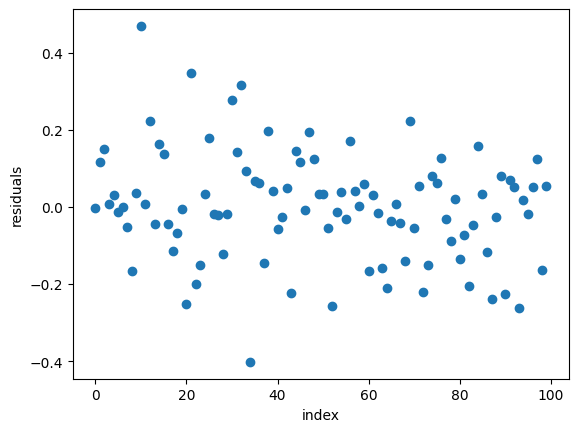

In [7]:
#! snip: Lab3

# check independence
plt.scatter(x = range(len(e)), y = e)
plt.xlabel('index')
plt.ylabel('residuals');

#! snip-end

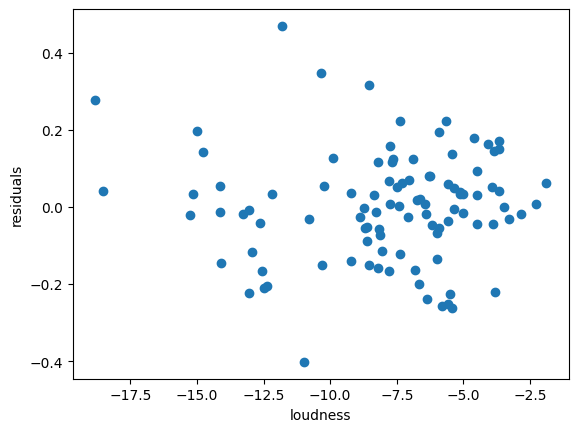

In [8]:
#! snip: Lab3

# check constant variance/linearity
plt.scatter(x = x, y = e)
plt.xlabel('loudness')
plt.ylabel('residuals');

#! snip-end

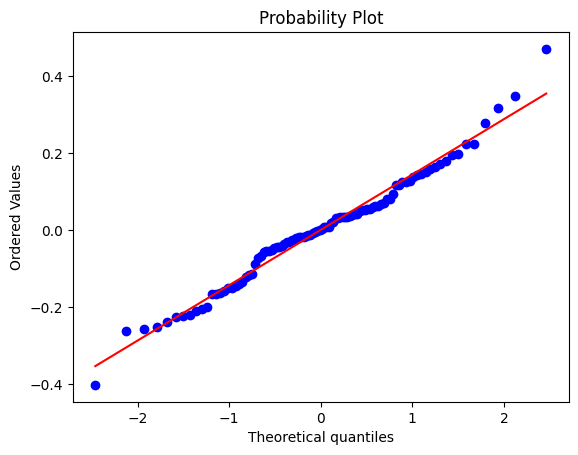

In [9]:
#! snip: Lab3

# check normality
stats.probplot(e, dist="norm", plot=py)
py.show()

#! snip-end

#! snip: Lab3

- Independence: I believe the first plot looks decently random enough, and I can't identify any patterns in the residuals. This indicates to me that the residuals are sufficiently independent and I don't have to worry about anything being systematically ignored.
- Constant Variance: The second plot I could go either way on... generally I believe it also looks like a decently random scatter, and there's no systematic pattern that would suggest non-constant variance or curving that would suggest linearity is violated. Perhaps there are two clouds of points, which may indicate some feature should be accounted for (perhaps mode?) but I don't think so.
- Normality: The plot looks very good to me; the points seem to follow the straight 45 degree line that indicates normality fairly closely.

Overall, I don't see anything in these residuals that stands out to me as having violated the assumptions, so I think this model is fairly appropriate.

#! snip-end

## Part 2.3: Summarize and Outline Future Steps (10 points)

Bring your thoughts together from all the previous parts of this lab and write a **detailed** paragraph or two of **at least five sentences** which discusses:

- Did you find that the simple linear regression model does a good job of predicting your chosen $y$ feature?
  - If so, how could this model be used practically? What were the key takeaways that you would use to summarize the results to someone interested in music?
  - If not, why isn't it an adequate model? Do you think there is still promise/things you can do to adjust the model so that it does a better job or is more adequate for predicting $y$?
- Regardless of your answer to the previous question, also reflect upon:
  - (a) If you were to do it over again, would you choose different features? Was there another question you feel you could have answered using these data?
  - (b) If you were to move forward, how would you improve upon the model you built? Whether you think it is already useful or not, remember that it could *always* be made better in some way.

#! snip: Lab3

Based on the fact that all the residual plots seem pretty reasonable to me, and that I think a cross validated $R^2$ of about 50\% seems pretty good, and the coefficients don't seem too crazy to me, I think this is a pretty good model for predicting my chosen $y$ feature of energy. This could be used practically by letting bands know that if they are hoping to create more energetic songs, that they should tend to play louder (and vice versa, if they want chill songs, maybe play less loud). That may seem obvious, but since loudness seems to explain a good bit of energy, it may be something that a band takes for granted. I don't think I would choose different features for the purposes of this lab, since these two looked the most linearly related to me, but I might have tried to predict `danceability` instead, because that seems more fun to me... Moving forward, definitely including a few more features could help improve the predictive ability of the model; I could investigate including things that make sense in terms of explaining energy, like perhaps acousticness (which I assume to be negatively correlated) and tempo (which I assume to be positively correlated).

#! snip-end